# groupby
  + 데이터를 특정 컬럼으로 묶어서 그룹화
  + 아래의 세 단계를 적용하여 데이터를 그룹화(groupping) (SQL의 group by 와 개념적으로는 동일, 사용법은 유사)
    - 데이터 분할 (split)
    - operation 적용 (apply)
    - 데이터 병합 (combine)
    

In [1]:
import pandas as pd
import numpy as np 

path = r'data/titanic.csv'

df = pd.read_csv(path)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## groupby(),  groups 속성
 - 각 그룹과 그룹에 속한 index를 dict 형태로 표현

In [2]:
grouded_pclass = df.groupby('Pclass')
grouded_pclass

In [3]:
grouded_pclass.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [4]:
grouded_pclass.size()

Pclass
1    216
2    184
3    491
dtype: int64

In [5]:
grouded_gender = df.groupby('Sex')
grouded_gender

In [6]:
grouded_gender.size()

Sex
female    314
male      577
dtype: int64

### get_group()
그룹별 DataFrame 리턴

In [7]:
grouded_pclass.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
grouded_pclass.get_group(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [9]:
grouded_gender.get_group('female').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### groupby 객체는 iterable 하다
group id(key) 과 group(DataFrame) 의 tuple 로 iteration 된다.

In [10]:
for groupid, group in grouded_pclass:
    print(groupid, type(group), group['Pclass'].count())

1 <class 'pandas.core.frame.DataFrame'> 216
2 <class 'pandas.core.frame.DataFrame'> 184
3 <class 'pandas.core.frame.DataFrame'> 491


## groupby 객체의 기초 연산 메소드
 - 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외하여 연산)
 - count - 데이터 개수 
 - sum   - 데이터의 합
 - mean, std, var - 평균, 표준편차, 분산
 - min, max - 최소, 최대값

In [11]:
grouded_pclass.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [12]:
grouded_pclass.sum()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,99705,136,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femalefemalemalefemalemalemalemalefemalemalema...,7111.42,90,77,PC 175991138031746311378311378819950PC 17601PC...,18177.4125,C85C123E46C103A6C23 C25 C27B78D33B30C52B28C83C...,CSSSSSCCCSCCSSCSSSCCSSCSSSCSCSSSCCSSCCCCCSSQSS...
2,82056,87,"Nasser, Mrs. Nicholas (Adele Achem)Hewlett, Mr...",femalefemalemalemalemalemalefemalefemalefemale...,5168.83,74,70,237736248706244373239865248698C.A. 2457911668S...,3801.8417,D56F33E101F2F4F2DE101DF2F33DF33F4E101E77,CSSSSSSCSSSSSSSSSSSSCSSSCSSSSSSSCSSSSSSSSSSSSS...
3,215625,119,"Braund, Mr. Owen HarrisHeikkinen, Miss. LainaA...",malefemalemalemalemalefemalefemalemalemalefema...,8924.92,302,193,A/5 21171STON/O2. 3101282373450330877349909347...,6714.6951,G6F G73F E69G6G6G6E10F G63F G73E121F38E121,SSSQSSSSSSQSCQSSCQSQCSSCSCQSQQCSSSCSCSCSSSSCSS...


In [14]:
grouded_pclass.mean(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
grouded_pclass['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
grouded_pclass['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [17]:
grouded_gender['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## 복수 columns로 groupping 하기
 - groupby에 column 리스트를 전달
 - 통계함수를 적용한 결과는 multiindex를 갖는 dataframe

In [18]:
grouped_multi = df.groupby(['Pclass', 'Sex'])
grouped_multi

In [19]:
grouped_multi.groups

{(1, 'female'): [1, 3, 11, 31, 52, 61, 88, 136, 151, 166, 177, 194, 195, 215, 218, 230, 256, 257, 258, 268, 269, 275, 290, 291, 297, 299, 306, 307, 309, 310, 311, 318, 319, 325, 329, 334, 337, 341, 356, 366, 369, 375, 380, 383, 393, 412, 435, 457, 486, 496, 498, 504, 513, 520, 523, 537, 539, 540, 556, 558, 571, 577, 581, 585, 591, 609, 627, 641, 669, 689, 700, 708, 710, 716, 730, 742, 759, 763, 765, 779, 781, 796, 809, 820, 829, 835, 842, 849, 853, 856, 862, 871, 879, 887], (1, 'male'): [6, 23, 27, 30, 34, 35, 54, 55, 62, 64, 83, 92, 96, 97, 102, 110, 118, 124, 137, 139, 155, 168, 170, 174, 185, 187, 209, 224, 245, 248, 252, 262, 263, 270, 273, 284, 295, 298, 305, 331, 332, 336, 339, 351, 370, 373, 377, 390, 430, 434, 438, 445, 447, 449, 452, 453, 456, 460, 462, 467, 475, 484, 487, 492, 493, 505, 507, 512, 515, 527, 536, 544, 545, 550, 555, 557, 572, 583, 587, 599, 602, 604, 607, 621, 625, 630, 632, 633, 645, 647, 659, 660, 662, 671, 679, 681, 690, 694, 698, 701, ...], (2, 'female'): [

In [20]:
grouped_multi.size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [21]:
grouped_multi2 = df.groupby(['Sex', 'Pclass'])
grouped_multi2.size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [22]:
grouped_multi.mean(numeric_only=True)

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [ ]:
grouded_pclass.mean(numeric_only=True).index

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [ ]:
grouped_multi.mean(numeric_only=True).index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [26]:
grouped_multi.mean(numeric_only=True).loc[(2, 'female')]

PassengerId    443.105263
Survived         0.921053
Age             28.722973
SibSp            0.486842
Parch            0.605263
Fare            21.970121
Name: (2, female), dtype: float64

In [27]:
df.groupby(['Pclass', 'Sex']).mean(numeric_only=True)['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## index를 이용한 group by
 - index가 있는 경우, groupby 함수에 level 사용 가능
   - level은 index의 depth를 의미하며, 가장 왼쪽부터 0부터 증가
   
* **set_index** 함수
 - column 데이터를 index 레벨로 변경
* **reset_index** 함수
 - 인덱스 초기화

In [28]:
df.set_index('Pclass')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
3,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [29]:
df.set_index(['Pclass', 'Sex'])

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S


In [30]:
df.set_index(['Pclass', 'Sex']).reset_index()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


#### groupby(level), groupby(함수)

- groupby(컬럼 혹은 컬럼 리스트)
- gorupby(level=?)
- groupby(함수)

In [31]:
df.set_index('Embarked').groupby(level=0).mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [32]:
df.set_index('Age').groupby(level=0).mean(numeric_only=True)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,0.0,0.0,42.0792


In [33]:
df.set_index('Age')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
27.0,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
19.0,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
NaN,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S


In [34]:
import math

def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10

In [35]:
age_categorize(29.3)

20

In [36]:
age_categorize(11.2)

10

In [37]:
df.set_index('Age').groupby(age_categorize).mean(numeric_only=True)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
-1,435.581921,0.293785,2.598870,0.564972,0.180791,22.158567
0,424.741935,0.612903,2.629032,1.854839,1.403226,30.576679
10,444.362745,0.401961,2.470588,0.666667,0.470588,32.535132
20,433.231818,0.350000,2.450000,0.322727,0.250000,27.278937
30,472.449102,0.437126,2.113772,0.353293,0.329341,40.377294
40,465.606742,0.382022,1.966292,0.370787,0.471910,38.002297
50,440.187500,0.416667,1.562500,0.291667,0.270833,47.933333
60,433.736842,0.315789,1.473684,0.263158,0.368421,48.367542
70,496.500000,0.000000,1.833333,0.166667,0.166667,30.197233


In [39]:
df.set_index('Age').groupby(age_categorize).mean(numeric_only=True)['Survived']

Age
-1     0.293785
 0     0.612903
 10    0.401961
 20    0.350000
 30    0.437126
 40    0.382022
 50    0.416667
 60    0.315789
 70    0.000000
 80    1.000000
Name: Survived, dtype: float64

## MultiIndex 를 이용한 grouping

In [40]:
df.set_index(['Pclass', 'Sex'])

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S


In [41]:
df.set_index(['Pclass','Sex']).groupby(level=0).mean(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [42]:
df.set_index(['Pclass','Sex']).groupby(level=1).mean(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Sex,,,,,,
female,431.028662,0.742038,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,30.726645,0.429809,0.235702,25.523893


In [43]:
df.set_index(['Pclass','Sex']).groupby(level=[0,1]).mean(numeric_only=True)

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [44]:
df.set_index(['Pclass','Sex']).groupby(level=[1,0]).mean(numeric_only=True)

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [46]:
df.set_index(['Pclass','Sex']).groupby(level=[0,1]).mean(numeric_only=True)['Age']

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [47]:
df.set_index(['Pclass','Sex']).groupby(level=[0,1]).mean(numeric_only=True)['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## aggregate(집계) 함수 사용하기
 - groupby 결과에 '집계함수'를 적용하여 그룹별 데이터 확인 가능

In [48]:
np.sum([10,20,30])

np.int64(60)

In [49]:
df.groupby(['Pclass', 'Sex']).sum()

PassengerId  Survived  \
Pclass Sex                             
1      female        44106        91   
       male          55599        45   
2      female        33676        70   
       male          48380        17   
3      female        57561        72   
       male         158064        47   

                                                            Name      Age  \
Pclass Sex                                                                  
1      female  Cumings, Mrs. John Bradley (Florence Briggs Th...  2942.00   
       male    McCarthy, Mr. Timothy JSloper, Mr. William Tho...  4169.42   
2      female  Nasser, Mrs. Nicholas (Adele Achem)Hewlett, Mr...  2125.50   
       male    Williams, Mr. Charles EugeneFynney, Mr. Joseph...  3043.33   
3      female  Heikkinen, Miss. LainaJohnson, Mrs. Oscar W (E...  2218.50   
       male    Braund, Mr. Owen HarrisAllen, Mr. William Henr...  6706.42   

               SibSp  Parch  \
Pclass Sex                    
1      female     52     43   
       male       38     34   
2      female     37     46   
       male       37     24   
3      female    129    115   
       male      173     78   

                                                          Ticket       Fare  \
Pclass Sex                                                                    
1      female  PC 17599113803113783PC 17569PC 175721135721995...  9975.8250   
       male    1746311378819950PC 17601PC 1760411378911350919...  8201.5875   
2      female  23773624870611668SC/Paris 21232926C.A. 31026C....  1669.7292   
       male    244373239865248698C.A. 24579C.A. 33111S.O.C. 1...  2132.1125   
3      female  STON/O2. 3101282347742PP 954935040634576326493...  2321.1086   
       male    A/5 21171373450330877349909A/5. 21513470823826...  4393.5865   

                                                           Cabin  \
Pclass Sex                                                         
1      female  C85C123C103B78D33B28C23 C25 C27D47C2E33C49B4B8...   
       male    E46A6C23 C25 C27B30C52C83E31A5D10 D12D26C110B5...   
2      female                       F33E101E101DF33DF33F4E101E77   
       male                                         D56F2F4F2DF2   
3      female                                  G6F E69G6G6G6E121   
       male                            F G73E10F G63F G73E121F38   

                                                        Embarked  
Pclass Sex                                                        
1      female  CSSCCSSSSCCCCCSCSCSSSSCSCCCCCCSCCCSCSSCCCCSCQS...  
       male    SSSCCSCSSCSSCCSSCSSCCSSCSSCSQSSSSSCSCSSSSSSSCC...  
2      female  CSSCSSSSSSSSSSSSSSSSQSSQSSSSSSCSSSSSSSSSSSSCSS...  
       male    SSSSSSSSSSCSCSSSSSSCSSSSSSSSSSSSSSSSSSSCCSSSSS...  
3      female  SSSSSCQSSQQSCSQQSSSSQSSSQCSCSCSCSSSQSSSSQSQSQS...  
       male    SSQSSSQCSCSCSQCSSCSCSCSSCSSSSSSSSSSSSSSSSSSSSS...

In [ ]:
df.groupby(['Pclass', 'Sex']).aggregate(np.sum)

C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\3878810352.py:1: FutureWarning: The provided callable <function sum at 0x00000285C324E840> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['Pclass', 'Sex']).agg(np.sum)


PassengerId  Survived  \
Pclass Sex                             
1      female        44106        91   
       male          55599        45   
2      female        33676        70   
       male          48380        17   
3      female        57561        72   
       male         158064        47   

                                                            Name      Age  \
Pclass Sex                                                                  
1      female  Cumings, Mrs. John Bradley (Florence Briggs Th...  2942.00   
       male    McCarthy, Mr. Timothy JSloper, Mr. William Tho...  4169.42   
2      female  Nasser, Mrs. Nicholas (Adele Achem)Hewlett, Mr...  2125.50   
       male    Williams, Mr. Charles EugeneFynney, Mr. Joseph...  3043.33   
3      female  Heikkinen, Miss. LainaJohnson, Mrs. Oscar W (E...  2218.50   
       male    Braund, Mr. Owen HarrisAllen, Mr. William Henr...  6706.42   

               SibSp  Parch  \
Pclass Sex                    
1      female     52     43   
       male       38     34   
2      female     37     46   
       male       37     24   
3      female    129    115   
       male      173     78   

                                                          Ticket       Fare  \
Pclass Sex                                                                    
1      female  PC 17599113803113783PC 17569PC 175721135721995...  9975.8250   
       male    1746311378819950PC 17601PC 1760411378911350919...  8201.5875   
2      female  23773624870611668SC/Paris 21232926C.A. 31026C....  1669.7292   
       male    244373239865248698C.A. 24579C.A. 33111S.O.C. 1...  2132.1125   
3      female  STON/O2. 3101282347742PP 954935040634576326493...  2321.1086   
       male    A/5 21171373450330877349909A/5. 21513470823826...  4393.5865   

                                                           Cabin  \
Pclass Sex                                                         
1      female  C85C123C103B78D33B28C23 C25 C27D47C2E33C49B4B8...   
       male    E46A6C23 C25 C27B30C52C83E31A5D10 D12D26C110B5...   
2      female                       F33E101E101DF33DF33F4E101E77   
       male                                         D56F2F4F2DF2   
3      female                                  G6F E69G6G6G6E121   
       male                            F G73E10F G63F G73E121F38   

                                                        Embarked  
Pclass Sex                                                        
1      female  CSSCCSSSSCCCCCSCSCSSSSCSCCCCCCSCCCSCSSCCCCSCQS...  
       male    SSSCCSCSSCSSCCSSCSSCCSSCSSCSQSSSSSCSCSSSSSSSCC...  
2      female  CSSCSSSSSSSSSSSSSSSSQSSQSSSSSSCSSSSSSSSSSSSCSS...  
       male    SSSSSSSSSSCSCSSSSSSCSSSSSSSSSSSSSSSSSSSCCSSSSS...  
3      female  SSSSSCQSSQQSCSQQSSSSQSSSQCSCSCSCSSSQSSSSQSQSQS...  
       male    SSQSSSQCSCSCSQCSSCSCSCSSCSSSSSSSSSSSSSSSSSSSSS...

In [52]:
df.groupby(['Pclass', 'Sex'])['Age'].aggregate([np.sum,np.mean,np.max])

C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\2343066140.py:1: FutureWarning: The provided callable <function sum at 0x00000285C324E840> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['Pclass', 'Sex'])['Age'].aggregate([np.sum,np.mean,np.max])
C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\2343066140.py:1: FutureWarning: The provided callable <function mean at 0x00000285C324FC40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Pclass', 'Sex'])['Age'].aggregate([np.sum,np.mean,np.max])
C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\2343066140.py:1: FutureWarning: The provided callable <function max at 0x00000285C324F240> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callabl

sum       mean   max
Pclass Sex                             
1      female  2942.00  34.611765  63.0
       male    4169.42  41.281386  80.0
2      female  2125.50  28.722973  57.0
       male    3043.33  30.740707  70.0
3      female  2218.50  21.750000  63.0
       male    6706.42  26.507589  74.0

In [53]:
df.groupby(['Pclass', 'Sex'])[['Age','Fare','Survived']].aggregate([np.sum,np.mean, np.max])

C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\2968734391.py:1: FutureWarning: The provided callable <function sum at 0x00000285C324E840> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['Pclass', 'Sex'])[['Age','Fare','Survived']].aggregate([np.sum,np.mean, np.max])
C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\2968734391.py:1: FutureWarning: The provided callable <function mean at 0x00000285C324FC40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Pclass', 'Sex'])[['Age','Fare','Survived']].aggregate([np.sum,np.mean, np.max])
C:\Users\kys05\AppData\Local\Temp\ipykernel_4444\2968734391.py:1: FutureWarning: The provided callable <function max at 0x00000285C324F240> is currently using SeriesGroupBy.max. In a futu

Age                        Fare                        \
                   sum       mean   max        sum        mean       max   
Pclass Sex                                                                 
1      female  2942.00  34.611765  63.0  9975.8250  106.125798  512.3292   
       male    4169.42  41.281386  80.0  8201.5875   67.226127  512.3292   
2      female  2125.50  28.722973  57.0  1669.7292   21.970121   65.0000   
       male    3043.33  30.740707  70.0  2132.1125   19.741782   73.5000   
3      female  2218.50  21.750000  63.0  2321.1086   16.118810   69.5500   
       male    6706.42  26.507589  74.0  4393.5865   12.661633   69.5500   

              Survived                
                   sum      mean max  
Pclass Sex                            
1      female       91  0.968085   1  
       male         45  0.368852   1  
2      female       70  0.921053   1  
       male         17  0.157407   1  
3      female       72  0.500000   1  
       male         47  0.135447   1

# 도전 : 각 객실등급별 탑승승객인원, 생존자수, 생존률은?

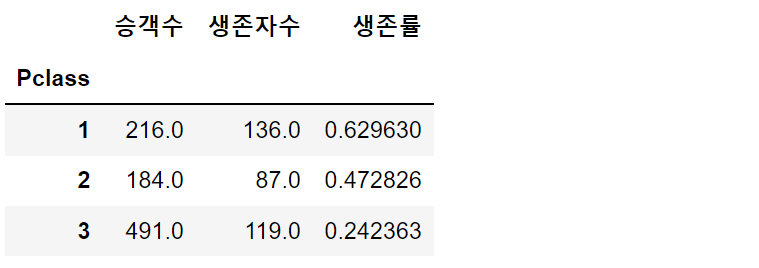

---

In [ ]:
df_quiz = df.groupby('Pclass')['Survived'].aggregate(['count', 'sum', 'mean'])
df_quiz.columns = ['승객수', '생존자수', '생존률']
df_quiz

,승객수,생존자수,생존률
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


#### DataFrame  정렬하기
.sort_values()

In [55]:
df.sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [56]:
df.sort_values('Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [59]:
df.sort_values(['Pclass', 'Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
